# Se procede a limpiar los datos y probar distintos modelos

(array([ 1.,  0.,  3., 16., 42., 53., 51., 39., 25., 20.]),
 array([133.9549955 , 139.67503506, 145.39507463, 151.11511419,
        156.83515376, 162.55519333, 168.27523289, 173.99527246,
        179.71531203, 185.43535159, 191.15539116]),
 <BarContainer object of 10 artists>)

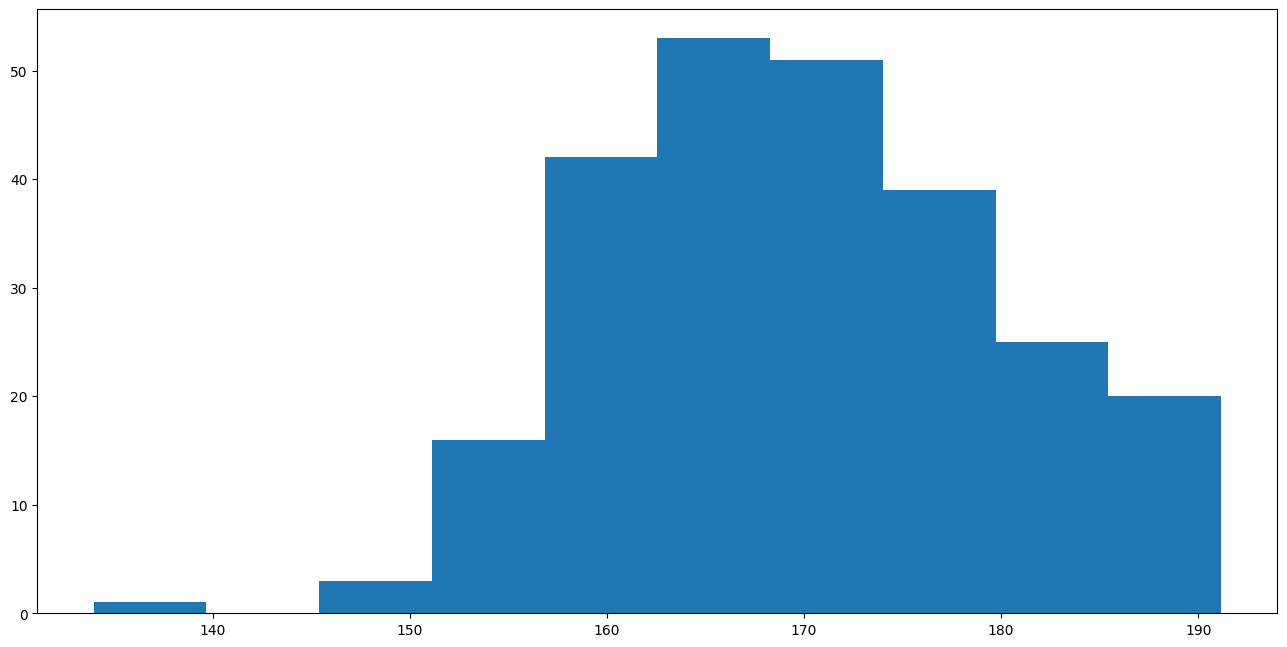

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(x)

In [24]:
import pandas as pd
import re, string

In [25]:
data = pd.read_csv('../data_files/Datos.csv')
data = data.drop(['i'],axis=1)
# Se aleatoriza la muestra
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Texto,class
0,22 Jun 2022\nChainalysis lanza un servicio de ...,0
1,30 May 2022\nMoneyGram abrirá una plataforma d...,1
2,21 Jun 2022\nCointelegraph Store presenta la c...,1
3,William Suberg\n29 May 2022\nBTC marcará un nu...,1
4,Arijit Sarkar\n28 May 2022\nLa dificultad de l...,1


In [26]:
# Normalización del texto
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

data['Texto'] = data['Texto'].apply(wordopt)

In [27]:
import spacy
nlp = spacy.load("es_core_news_sm")
stopwords = spacy.lang.es.stop_words.STOP_WORDS
def alfabetiza(text):
    doc = nlp(text, disable=['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]

    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

data['Texto'] = data['Texto'].apply(alfabetiza)
data.head()

,Texto,class
0,jun chainalysis lanza servicio atención empres...,0
1,may moneygram abrir plataforma transferencia s...,1
2,jun cointelegraph store presentar colección su...,1
3,william suberg may btc marcar récord semana pé...,1
4,arijit sarkar may dificultad red bitcoin caer ...,1


In [28]:
# Creación de datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split

x = data["Texto"]
y = data["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
# Conversión de texto a vectores
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Implementación de modelos

In [30]:
from sklearn.metrics import classification_report

## Modelo 1

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state = 0, n_estimators=500, loss='log_loss',max_depth=3,learning_rate=0.05,min_weight_fraction_leaf=0.5)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, min_weight_fraction_leaf=0.5,
                           n_estimators=500, random_state=0)

In [32]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.5185185185185185

In [33]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        17
           1       0.36      0.40      0.38        10

    accuracy                           0.52        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.53      0.52      0.52        27



## Modelo 2

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0,penalty = 'l2')
LR.fit(xv_train, y_train)

LogisticRegression(random_state=0)

In [35]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)

0.7037037037037037

In [36]:
print(classification_report(y_test, pred_lr,zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.75      0.30      0.43        10

    accuracy                           0.70        27
   macro avg       0.72      0.62      0.61        27
weighted avg       0.72      0.70      0.66        27



## Modelo 3

In [37]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=0.5)
DTC.fit(xv_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.5)

In [38]:
pred_dtc = DTC.predict(xv_test)
DTC.score(xv_test, y_test)

0.37037037037037035

In [39]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.27      0.40      0.32        10

    accuracy                           0.37        27
   macro avg       0.38      0.38      0.37        27
weighted avg       0.41      0.37      0.38        27



## Modelo 4

In [40]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=500,criterion='entropy',min_weight_fraction_leaf=0.5,min_samples_leaf=2)
RFC.fit(xv_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_weight_fraction_leaf=0.5, n_estimators=500)

In [41]:
pred_rfc= RFC.predict(xv_test)
RFC.score(xv_test,y_test)

0.5925925925925926

In [42]:
print(classification_report(y_test, pred_rfc,zero_division=1))

              precision    recall  f1-score   support

           0       0.62      0.94      0.74        17
           1       0.00      0.00      0.00        10

    accuracy                           0.59        27
   macro avg       0.31      0.47      0.37        27
weighted avg       0.39      0.59      0.47        27



# Se exporta el mejor modelo

In [44]:
from joblib import dump
dump(DTC,'../modelos/DTClassifier.joblib')

['../modelos/DTClassifier.joblib']